<a href="https://colab.research.google.com/github/moisescortes/Nuevo_Repo/blob/master/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [25]:
#Carga los datos usando tu lector de csv o con pandas. Es recomendable hacerlo con pandas.
#Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

df = pd.read_csv('imma2013.csv')
df.columns
df.head()
tail = df.tail()
tail.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 123 to 127
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Clave                                2 non-null      float64
 1   Municipio                            2 non-null      object 
 2   Region                               2 non-null      object 
 3   Acuiferos                            2 non-null      float64
 4   Nivel                                2 non-null      object 
 5   Acuiferos_Normalizado                2 non-null      float64
 6   Agua                                 2 non-null      float64
 7   Nivel.1                              2 non-null      object 
 8   Agua_Normalizado                     2 non-null      float64
 9   Drenaje                              2 non-null      float64
 10  Nivel.2                              2 non-null      object 
 11  Drenaje_Normalizado             

,Clave,Acuiferos,Acuiferos_Normalizado,Agua,Agua_Normalizado,Drenaje,Drenaje_Normalizado,NOM,NOM_Normalizado,UGAs_Conservacion,...,Recuperacion_Normalizado,Riesgo_ Erosion,Riesgo _Erosion_Normalizado,RETC,RETC_Normalizado,\nIndice_Municipal_de_Medio_Ambiente,LUGAR_ESTATAL,Subindice_presion,Subindice_estado,Subindice_ respuesta
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,63.000000,34.682213,0.653178,90.234935,0.860499,92.302740,0.897370,0.800000,0.013333,39.501079,...,0.160434,13.125225,0.781246,0.800000,0.984000,53.767603,63.000000,0.581504,0.504826,0.565038
std,36.228442,43.777996,0.437780,8.980824,0.128297,9.357182,0.124762,1.079021,0.017984,28.261903,...,0.134229,7.916783,0.131946,3.652142,0.073043,7.990193,36.228442,0.154627,0.122359,0.109267
min,1.000000,0.000000,0.000000,51.002674,0.300038,32.738412,0.103179,0.000000,0.000000,0.000000,...,0.000000,0.123166,0.405091,0.000000,0.283784,34.099338,1.000000,0.214000,0.281784,0.304699
25%,32.000000,0.000000,0.081147,87.953795,0.827911,91.105464,0.881406,0.442478,0.007375,14.653763,...,0.053976,7.522855,0.713331,0.000000,1.000000,47.216482,32.000000,0.496419,0.366751,0.484975
50%,63.000000,1.113804,0.988862,93.662498,0.909464,95.363541,0.938181,0.442478,0.007375,41.754765,...,0.133166,11.495520,0.808408,0.000000,1.000000,55.793946,63.000000,0.589047,0.545027,0.543682
75%,94.000000,91.885263,1.000000,95.832374,0.940462,96.873218,0.958310,0.884956,0.014749,60.181580,...,0.236381,17.200157,0.874619,0.000000,1.000000,59.324530,94.000000,0.683844,0.598764,0.649792
max,125.000000,100.000000,1.000000,98.531536,0.979022,98.620175,0.981602,8.849558,0.147493,95.198580,...,0.726832,35.694514,0.997947,35.810811,1.000000,67.487727,125.000000,0.884146,0.713780,0.785711


<ipython-input-27-c9b467a75a1c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df_seleccionado.corr()


<Axes: >

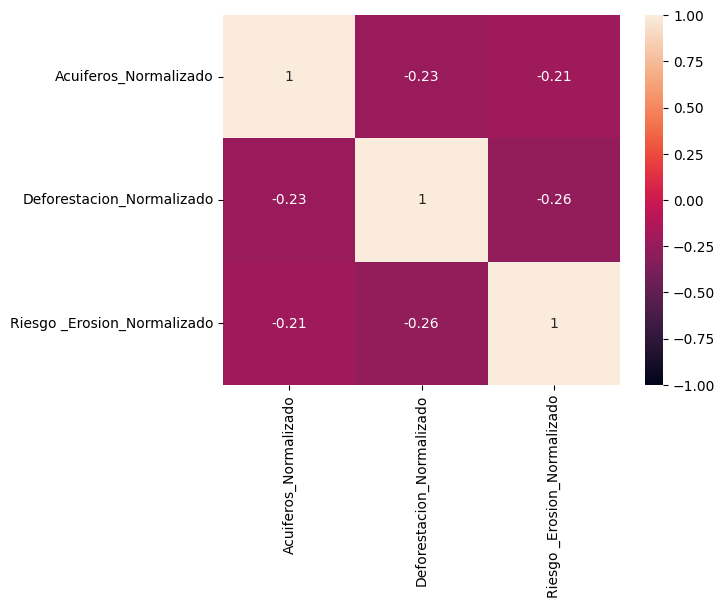

In [27]:
columnas_deseadas = ['Municipio', 'Region', 'Acuiferos_Normalizado', 'Deforestacion_Normalizado', 'Riesgo _Erosion_Normalizado']
df_seleccionado = df[columnas_deseadas]

fig = plt.figure()
corr =df_seleccionado.corr()
sns.heatmap(data = corr, vmin = -1, vmax =1, annot = True)

<Axes: xlabel='Deforestacion_Normalizado', ylabel='Riesgo _Erosion_Normalizado'>

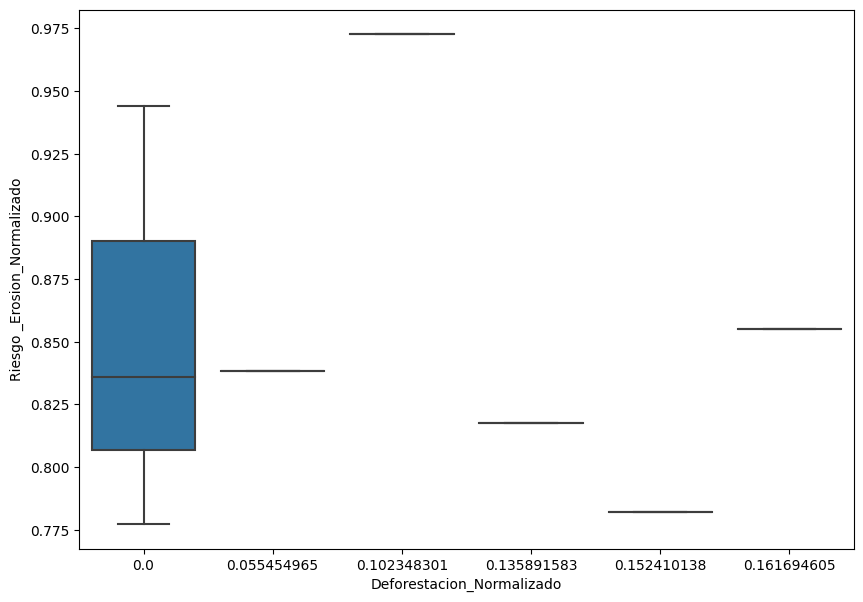

In [40]:
fig = plt.figure(figsize=(10,7))
df_deforestacion_alto = df_seleccionado[(df_seleccionado['Deforestacion_Normalizado'] <0.2)]
sns.boxplot(data = df_deforestacion_alto, y = 'Riesgo _Erosion_Normalizado', x ='Deforestacion_Normalizado')


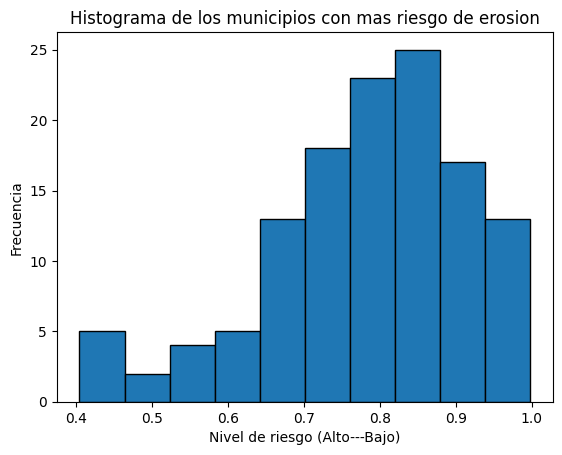

In [38]:
df_riesgo = df['Riesgo _Erosion_Normalizado']
plt.hist(df_riesgo,bins = 10, edgecolor='black')
plt.title('Histograma de los municipios con mas riesgo de erosion')
plt.xlabel('Nivel de riesgo (Alto---Bajo)')
plt.ylabel('Frecuencia')

plt.show()
